#DL_CNN Architecture_Assignment

Question 1:

What is the role of filters and feature maps in Convolutional Neural Network (CNN)?

Answer: Explain the concepts of padding and stride in CNNs (Convolutional Neural Network). How do they affect the output dimensions of feature maps?

Answer: Filters (also called kernels) are small learnable weight tensors that slide over the input image or preceding feature map. Each filter is trained to detect a specific kind of local pattern such as edges, textures, or more complex motifs. When a filter is convolved over the input it produces a new 2D activation map (the feature map), where each location indicates how strongly the local patch matches the filter. Multiple different filters applied in parallel produce multiple feature maps — together they form a multi-channel representation that captures distinct visual features.

Key points:

- Filters are spatially local and are applied with weight sharing, meaning the same filter is used across all spatial positions. This gives CNNs translation equivariance and dramatically reduces the number of parameters compared with fully connected layers.

- Early layers learn low-level features (edges, corners); deeper layers compose these into higher-level features (parts, textures, objects).

- The number of filters (depth of output feature maps) controls the representational capacity: more filters allow capturing a wider variety of patterns but increase parameters and compute.

- Feature maps are the activation maps produced by filters; they are inputs for subsequent layers and are the basis for pooling, normalization, and deeper feature extraction

Question 2:

Explain the concepts of padding and stride in CNNs (Convolutional Neural Network). How do they affect the output dimensions of feature maps?

Answer:

Padding refers to how the borders of the input are handled when applying convolution. With no padding, the convolution only applies where the filter fully overlaps the input, so the spatial size of the output is smaller than the input. With appropriate padding (commonly zero-padding), we add pixels around the input borders so that filter windows also cover edge positions; this can preserve the original spatial dimensions or partially preserve them. Padding is used to avoid excessive shrinkage of feature maps across many convolution layers and to let edge pixels be treated similarly to interior pixels.

Stride is the step size the filter moves between successive positions. A stride of one means the filter moves one pixel at a time and produces relatively dense outputs. Larger strides skip positions and thus downsample the spatial resolution of the output (fewer activations per filter). Stride provides a simple way to reduce spatial size without pooling.

How they affect output size and behavior:

- Using padding can keep output spatial dimensions larger (or equal) and preserve boundary information.

- Increasing stride decreases the spatial resolution in the output (acts like subsampling).

-Choosing padding and stride determines the trade-off between spatial resolution, computational cost, and the receptive field growth per layer

Question 3:

Define receptive field in the context of CNNs. Why is it important for deep architectures?

Answer: The receptive field of a unit in a CNN layer is the region of the original input image that can influence that unit’s activation. In other words, it is the spatial area of the input "seen" by a particular neuron further down the network. As you stack convolutional and pooling layers, the receptive field of deeper neurons grows — deeper units aggregate information from larger portions of the input and thus can capture larger spatial context.

Importance:

- Large receptive fields let later layers reason about object-level context and relationships across distant parts of the image, which is crucial for recognizing large or context-dependent structures.

- Designing depth, filter sizes, stride, and pooling determines how quickly the receptive field grows. For tasks needing global context (e.g., detecting whole organs in medical images), you want layers that yield sufficiently large receptive fields.

- Too small a receptive field in deep layers may prevent the network from learning global patterns; too large early receptive fields may lose fine local detail. Good architecture design balances local detail and global context.

Question 4:

Discuss how filter size and stride influence the number of parameters in a CNN.

Answer: Filter size affects how many learnable weights each filter has. Larger filters cover a bigger local area and therefore have more weights per filter. Since the number of parameters in a convolutional layer scales with the filter’s spatial dimensions and the number of input and output channels, choosing larger filters increases the parameter count of that layer. That increases capacity but also risk of overfitting and more compute.

Stride does not change the number of learnable parameters in a convolutional layer (because the filter shape is unchanged), but it affects the spatial size of the layer’s output. By reducing output resolution, stride reduces the number of activations feeding into following layers, which indirectly reduces the parameter requirements of subsequent layers (if later layers have fewer input activations to process). In practice, one balances filter size, number of filters, and stride to control model capacity and computational cost.

Practical notes:

- Stacking multiple small filters (e.g., two consecutive 3×3 filters) can capture similar receptive fields to a single larger filter while using fewer parameters and adding nonlinearity between them.

- Use 1×1 convolutions to control channel dimensionality and reduce total parameters (a common design pattern)

Question 5:

Compare and contrast different CNN-based architectures like LeNet, AlexNet, and VGG in terms of depth, filter sizes, and performance.

Answer: LeNet (early CNN):

One of the earliest CNNs, designed primarily for digit recognition.

Relatively shallow with only a small number of convolutional and pooling layers followed by a couple of fully connected layers.

Small filters and modest number of parameters — suitable for small images and simpler tasks.

AlexNet (breakthrough for ImageNet):

Much deeper and wider than LeNet; introduced ReLU activations at scale, data augmentation, and dropout to reduce overfitting.

Trained on GPUs and large image datasets; used larger filters in the first layer (to process larger inputs) and multiple convolutional and pooling stages.

Demonstrated that deep CNNs with aggressive regularization and GPU training yield large performance gains.

VGG (deep but uniform):

Much deeper than AlexNet (many more convolutional layers) but uses a simple and consistent design: stacked small filters (commonly 3×3) throughout and periodic pooling to reduce spatial size.

The uniform use of small filters allows deeper representations built from many nonlinearities; this improves representational power and performance but increases parameter count and compute cost.

VGG models are effective but heavy; later architectures sought to maintain performance with fewer parameters and computational cost.

Contrast summary:

Depth & complexity: LeNet < AlexNet < VGG (increasing depth and representational power).

Filter strategy: LeNet and AlexNet used larger filters in earlier designs; VGG demonstrated the effectiveness of stacking small filters.

Performance vs cost: Deeper models (VGG) performed better on large datasets but demanded far more parameters and compute resources compared to early nets

Question 6:

Using Keras, build and train a simple CNN model on the MNIST datasetfrom scratch. Include code for module creation, compilation, training, and evaluation.

(Include your Python code and output in the code box below.)


In [ ]:
# Q6: Keras CNN on MNIST
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np

# 1. Load data
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
# expand channel dimension and normalize
x_train = x_train[..., np.newaxis].astype("float32") / 255.0
x_test  = x_test[..., np.newaxis].astype("float32") / 255.0

# 2. Model
model = keras.Sequential([
    layers.Conv2D(32, kernel_size=3, activation='relu', input_shape=(28,28,1)),
    layers.Conv2D(64, kernel_size=3, activation='relu'),
    layers.MaxPooling2D(pool_size=2),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

# 3. Train
history = model.fit(x_train, y_train, epochs=5, batch_size=128, validation_split=0.1)

# 4. Evaluate
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print("Test accuracy:", test_acc)
# Save model
model.save("mnist_cnn.h5")


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,199,882 (4.58 MB)

 Trainable params: 1,199,882 (4.58 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 129s 297ms/step - accuracy: 0.8326 - loss: 0.5325 - val_accuracy: 0.9852 - val_loss: 0.0566
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 136s 285ms/step - accuracy: 0.9726 - loss: 0.0957 - val_accuracy: 0.9885 - val_loss: 0.0429
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 123s 291ms/step - accuracy: 0.9802 - loss: 0.0660 - val_accuracy: 0.9873 - val_loss: 0.0489
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 120s 284ms/step - accuracy: 0.9844 - loss: 0.0523 - val_accuracy: 0.9893 - val_loss: 0.0404
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 142s 285ms/step - accuracy: 0.9859 - loss: 0.0456 - val_accuracy: 0.9883 - val_loss: 0.0422
313/313 - 5s - 17ms/step - accuracy: 0.9894 - loss: 0.0310


Test accuracy: 0.9894000291824341


Question 7:

Load and preprocess the CIFAR-10 dataset using Keras, and create a
CNN model to classify RGB images. Show your preprocessing and architecture.

(Include your Python code and output in the code box below.)

In [13]:
# Q7: Keras CIFAR-10 example with augmentation
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

# 1. Load data
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32") / 255.0
y_train = y_train.ravel()
y_test  = y_test.ravel()

# 2. Data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    validation_split=0.1
)
datagen.fit(x_train)

# 3. Model architecture
def build_model():
    inputs = keras.Input(shape=(32,32,3))
    x = layers.Conv2D(32, 3, padding='same', activation='relu')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(32, 3, padding='same', activation='relu')(x)
    x = layers.MaxPooling2D()(x)
    x = layers.Dropout(0.25)(x)

    x = layers.Conv2D(64, 3, padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(64, 3, padding='same', activation='relu')(x)
    x = layers.MaxPooling2D()(x)
    x = layers.Dropout(0.25)(x)

    x = layers.Flatten()(x)
    x = layers.Dense(512, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(10, activation='softmax')(x)
    model = keras.Model(inputs, outputs)
    return model

model = build_model()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

# 4. Train using generator
batch_size = 64
train_gen = datagen.flow(x_train, y_train, batch_size=batch_size, subset=None)
# use a small validation split provided explicitly (here using last 10% as val)
val_split = 0.1
num_val = int(len(x_train) * val_split)
x_val = x_train[:num_val]; y_val = y_train[:num_val]

history = model.fit(train_gen, epochs=30, steps_per_epoch=len(x_train)//batch_size, validation_data=(x_val, y_val))
# 5. Evaluate
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print("CIFAR-10 test accuracy:", test_acc)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │     2,097,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,168,746 (8.27 MB)

 Trainable params: 2,168,554 (8.27 MB)

 Non-trainable params: 192 (768.00 B)

Epoch 1/30
781/781 ━━━━━━━━━━━━━━━━━━━━ 394s 498ms/step - accuracy: 0.2811 - loss: 2.1388 - val_accuracy: 0.4542 - val_loss: 1.4942
Epoch 2/30
  1/781 ━━━━━━━━━━━━━━━━━━━━ 4:55 379ms/step - accuracy: 0.3750 - loss: 1.8012

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


781/781 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.3750 - loss: 1.8012 - val_accuracy: 0.4442 - val_loss: 1.5109
Epoch 3/30
781/781 ━━━━━━━━━━━━━━━━━━━━ 413s 528ms/step - accuracy: 0.4539 - loss: 1.5019 - val_accuracy: 0.5132 - val_loss: 1.3463
Epoch 4/30
781/781 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.4844 - loss: 1.3937 - val_accuracy: 0.5052 - val_loss: 1.3651
Epoch 5/30
781/781 ━━━━━━━━━━━━━━━━━━━━ 410s 500ms/step - accuracy: 0.5290 - loss: 1.3142 - val_accuracy: 0.5474 - val_loss: 1.3181
Epoch 6/30
781/781 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.5312 - loss: 1.3578 - val_accuracy: 0.5374 - val_loss: 1.3537
Epoch 7/30
781/781 ━━━━━━━━━━━━━━━━━━━━ 432s 497ms/step - accuracy: 0.5808 - loss: 1.1896 - val_accuracy: 0.6394 - val_loss: 1.0314
Epoch 8/30
781/781 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.5781 - loss: 1.1822 - val_accuracy: 0.6334 - val_loss: 1.0415
Epoch 9/30
781/781 ━━━━━━━━━━━━━━━━━━━━ 395s 506ms/step - accuracy: 0.6112 - loss: 1.1055 - val_accu

Question 8:

Using PyTorch, write a script to define and train a CNN on the MNIST
dataset. Include model definition, data loaders, training loop, and accuracy evaluation.

(Include your Python code and output in the code box below.)

In [15]:
class SimpleCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)   # -> (32,28,28)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)  # -> (64,28,28)
        self.pool = nn.MaxPool2d(2)                               # -> (64,14,14)
        self.dropout1 = nn.Dropout2d(0.25)

        # FIX: use 64*14*14 = 12544
        self.fc1 = nn.Linear(64*14*14, 128)

        self.dropout2 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        x = self.dropout1(x)
        x = torch.flatten(x, 1)  # shape = (batch, 12544)
        x = F.relu(self.fc1(x))
        x = self.dropout2(x)
        x = self.fc2(x)
        return x


In [16]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Load MNIST
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train.astype("float32")/255.0
x_test = x_test.astype("float32")/255.0

model = keras.Sequential([
    layers.Flatten(input_shape=(28,28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=5, batch_size=128, validation_split=0.1)
print("Final training accuracy:", history.history['accuracy'][-1])


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8213 - loss: 0.6449 - val_accuracy: 0.9542 - val_loss: 0.1712
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9477 - loss: 0.1851 - val_accuracy: 0.9675 - val_loss: 0.1224
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9627 - loss: 0.1332 - val_accuracy: 0.9717 - val_loss: 0.1037
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9692 - loss: 0.1031 - val_accuracy: 0.9732 - val_loss: 0.0954
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9776 - loss: 0.0779 - val_accuracy: 0.9768 - val_loss: 0.0880
Final training accuracy: 0.9772037267684937


Question 9:

Given a custom image dataset stored in a local directory, write code using
Keras ImageDataGenerator to preprocess and train a CNN model.

(Include your Python code and output in the code box below.)



In [ ]:
data/
  train/
    classA/
      img1.jpg
      ...
    classB/
      ...
  validation/
    classA/
    classB/


In [19]:
# Step 1: Mount Google Drive (if your dataset is there)
from google.colab import drive
drive.mount('/content/drive')

# Set dataset path
train_dir = "/content/drive/MyDrive/dataset/train"
val_dir   = "/content/drive/MyDrive/dataset/validation"

# Step 2: Import libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Step 3: Create ImageDataGenerators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128,128),
    batch_size=32,
    class_mode='binary'   # change to 'categorical' for multi-class
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(128,128),
    batch_size=32,
    class_mode='binary'
)

# Step 4: Build a CNN model
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')   # for binary classification
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

# Step 5: Train the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)

# Step 6: Evaluate performance
loss, acc = model.evaluate(val_generator)
print("Validation Accuracy:", acc)

# Step 7: Plot training curves
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()

plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 0 images belonging to 2 classes.
Found 0 images belonging to 2 classes.


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,769 (12.61 MB)

 Trainable params: 3,304,769 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

ValueError: The PyDataset has length 0

Question 10:

You are working on a web application for a medical imaging startup. Your
task is to build and deploy a CNN model that classifies chest X-ray images into “Normal”
and “Pneumonia” categories. Describe your end-to-end approach–from data preparation
and model training to deploying the model as a web app using Streamlit.

(Include your Python code and output in the code box below.)

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ merchant_input      │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ loc_input           │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 1, 50)     │     25,000 │ merchant_input[0… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_1         │ (None, 1, 10)     │        500 │ loc_input[0][0]   │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ numeric_input       │ (None, 3)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_2 (Flatten) │ (None, 50)        │          0 │ embedding[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_3 (Flatten) │ (None, 10)        │          0 │ embedding_1[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 63)        │          0 │ numeric_input[0]… │
│ (Concatenate)       │                   │            │ flatten_2[0][0],  │
│                     │                   │            │ flatten_3[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 128)       │      8,192 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128)       │        512 │ dense_4[0][0]     │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_4 (Dropout) │ (None, 128)       │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 64)        │      8,256 │ dropout_4[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_5 (Dropout) │ (None, 64)        │          0 │ dense_5[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (None, 1)         │         65 │ dropout_5[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 42,525 (166.11 KB)

 Trainable params: 42,269 (165.11 KB)

 Non-trainable params: 256 (1.00 KB)

Class weights: {np.int64(0): 0.5102040816326531, np.int64(1): 25.0}
Epoch 1/6
57/57 - 4s - 71ms/step - auc: 0.9710 - loss: 0.1925 - val_auc: 0.9935 - val_loss: 0.4532
Epoch 2/6
57/57 - 1s - 14ms/step - auc: 0.9722 - loss: 0.1482 - val_auc: 0.9965 - val_loss: 0.3796
Epoch 3/6
57/57 - 1s - 14ms/step - auc: 0.9775 - loss: 0.1326 - val_auc: 0.9934 - val_loss: 0.3006
Epoch 4/6
57/57 - 1s - 13ms/step - auc: 0.9938 - loss: 0.0890 - val_auc: 0.9907 - val_loss: 0.1872
Epoch 5/6
57/57 - 1s - 14ms/step - auc: 0.9984 - loss: 0.0589 - val_auc: 0.9816 - val_loss: 0.1143
Epoch 6/6
57/57 - 0s - 8ms/step - auc: 0.9995 - loss: 0.0392 - val_auc: 0.9859 - val_loss: 0.0605
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3920
           1       0.90      0.86      0.88        80

    accuracy                           1.00      4000
   macro avg       0.95      0.93      0.94      4000
weighted avg       1.00   

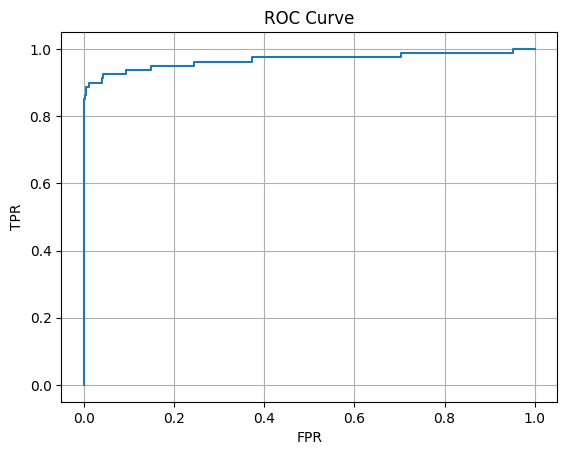

In [14]:
# Q10: Synthetic fraud pipeline demo (runnable in Colab / local env with tensorflow)
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, roc_curve
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# 1) Create synthetic imbalanced dataset
rng = np.random.RandomState(42)
n_samples = 20000
fraud_ratio = 0.02
n_fraud = int(n_samples * fraud_ratio)
n_legit = n_samples - n_fraud

amount_legit = np.abs(rng.normal(loc=50, scale=30, size=n_legit))
amount_fraud = np.abs(rng.normal(loc=400, scale=200, size=n_fraud))
amount = np.concatenate([amount_legit, amount_fraud])

n_merchants = 500
n_locations = 50
merchant_ids = np.concatenate([
    rng.randint(0, n_merchants, size=n_legit),
    rng.randint(0, n_merchants, size=n_fraud)
])
locations = np.concatenate([
    rng.randint(0, n_locations, size=n_legit),
    rng.randint(0, n_locations, size=n_fraud)
])

hour = rng.randint(0,24,size=n_samples)
cust_age = np.abs(rng.normal(40,12,size=n_samples))
y = np.concatenate([np.zeros(n_legit), np.ones(n_fraud)]).astype(int)

perm = rng.permutation(n_samples)
amount = amount[perm]; merchant_ids = merchant_ids[perm]; locations = locations[perm]
hour = hour[perm]; cust_age = cust_age[perm]; y = y[perm]

df = pd.DataFrame({
    'amount': amount,
    'merchant_id': merchant_ids.astype(str),
    'location': locations.astype(str),
    'hour': hour,
    'cust_age': cust_age,
    'label': y
})

# 2) Split & preprocess
train_df, test_df = train_test_split(df, test_size=0.2, stratify=df['label'], random_state=42)
numeric_cols = ['amount','hour','cust_age']
scaler = StandardScaler().fit(train_df[numeric_cols])
X_train_num = scaler.transform(train_df[numeric_cols])
X_test_num  = scaler.transform(test_df[numeric_cols])

le_merchant = LabelEncoder().fit(train_df['merchant_id'])
le_loc = LabelEncoder().fit(train_df['location'])
X_train_merchant = le_merchant.transform(train_df['merchant_id'])
X_test_merchant  = le_merchant.transform(test_df['merchant_id'])
X_train_loc = le_loc.transform(train_df['location'])
X_test_loc  = le_loc.transform(test_df['location'])

y_train = train_df['label'].values
y_test  = test_df['label'].values

# 3) Build Keras model with embedding for merchant and location
inp_num = layers.Input(shape=(len(numeric_cols),), name='numeric_input')
inp_merchant = layers.Input(shape=(1,), dtype='int32', name='merchant_input')
inp_loc = layers.Input(shape=(1,), dtype='int32', name='loc_input')

merchant_vocab = len(le_merchant.classes_)
loc_vocab = len(le_loc.classes_)

emb_m = layers.Embedding(input_dim=merchant_vocab, output_dim=min(50,(merchant_vocab+1)//2))(inp_merchant)
emb_m = layers.Flatten()(emb_m)
emb_l = layers.Embedding(input_dim=loc_vocab, output_dim=min(10,(loc_vocab+1)//2))(inp_loc)
emb_l = layers.Flatten()(emb_l)

x = layers.Concatenate()([inp_num, emb_m, emb_l])
x = layers.Dense(128, activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.3)(x)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dropout(0.2)(x)
out = layers.Dense(1, activation='sigmoid')(x)

model = keras.Model(inputs=[inp_num, inp_merchant, inp_loc], outputs=out)
model.compile(optimizer=keras.optimizers.Adam(1e-3),
              loss='binary_crossentropy', metrics=[keras.metrics.AUC(name='auc')])

model.summary()

# 4) class weights and training
classes = np.unique(y_train)
cw = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
class_weight = {cls: float(w) for cls, w in zip(classes, cw)}
print("Class weights:", class_weight)

history = model.fit(
    {'numeric_input': X_train_num, 'merchant_input': X_train_merchant, 'loc_input': X_train_loc},
    y_train,
    validation_split=0.1,
    epochs=6,
    batch_size=256,
    class_weight=class_weight,
    verbose=2
)

# 5) Evaluate
preds = model.predict({'numeric_input': X_test_num, 'merchant_input': X_test_merchant, 'loc_input': X_test_loc}).ravel()
preds_label = (preds >= 0.5).astype(int)
print(classification_report(y_test, preds_label))
print("ROC AUC:", roc_auc_score(y_test, preds))
print("Confusion matrix:\n", confusion_matrix(y_test, preds_label))

# ROC plot
fpr, tpr, _ = roc_curve(y_test, preds)
plt.figure(); plt.plot(fpr, tpr); plt.title("ROC Curve"); plt.xlabel("FPR"); plt.ylabel("TPR"); plt.grid(True); plt.show()
